# MSOD-B + RNA velocity analysis

# Set up for the analysis

In [1]:
cd /workspace

/workspace


In [2]:
import scanpy as sc
import scvelo as scv
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import os

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir='./out/MSODB_velocity'
scv.settings.figdir='./out/MSODB_velocity'
sc.settings.set_figure_params(dpi=100, dpi_save=300,fontsize=12, frameon=False, facecolor='white', format='png', color_map='Reds')
scv.set_figure_params(dpi=100, dpi_save=300,fontsize=12, frameon=False, facecolor='white', format='png', color_map='Reds')


In [3]:
print(sc.settings.figdir)

out/MSODB_velocity


In [4]:
results_file = 'data/MSODB_human_Velocity.h5ad'  # the file that will store the analysis results



In [5]:
adata = sc.read_h5ad('./data/MSODB_human.h5ad')
adata

AnnData object with n_obs × n_vars = 1979 × 3000
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'leiden_0.4', 'leiden_0.47', 'leiden_0.5', 'leiden_0.6', 'leiden_0.8', 'leiden_1', 'clusters', 'cell_types'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_types_colors', 'clusters_colors', 'hvg', 'leiden', 'leiden_0.47_colors', 'leiden_0.4_colors', 'leiden_0.5_colors', 'leiden_0.6_colors', 'leiden_0.8_colors', 'leiden_1_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
adata.obs_names

Index(['AAACCCAAGGAAACGA-1', 'AAACCCAAGGGTAATT-1', 'AAACCCAGTTGGACCC-1',
       'AAACCCATCACCCTCA-1', 'AAACCCATCCGTCACT-1', 'AAACGAAAGAGCTTTC-1',
       'AAACGCTTCCGCATAA-1', 'AAACGCTTCTGTGCGG-1', 'AAAGAACAGTTGCCCG-1',
       'AAAGGATAGTCTGGAG-1',
       ...
       'TTTGATCTCAAGGCTT-1', 'TTTGGAGGTAACTGCT-1', 'TTTGGAGGTAGCGATG-1',
       'TTTGGTTAGAGTGGCT-1', 'TTTGGTTAGGTTGGAC-1', 'TTTGGTTTCAATCTTC-1',
       'TTTGGTTTCATCCCGT-1', 'TTTGTTGCAATTTCTC-1', 'TTTGTTGCATGGCTAT-1',
       'TTTGTTGGTGTTGAGG-1'],
      dtype='object', length=1979)

In [7]:
ldata = sc.read_loom('./data/sample_1_Hg38.loom')
ldata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 3310 × 36601
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [8]:
adata = scv.utils.merge(adata, ldata)
adata

AnnData object with n_obs × n_vars = 1979 × 3000
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'leiden_0.4', 'leiden_0.47', 'leiden_0.5', 'leiden_0.6', 'leiden_0.8', 'leiden_1', 'clusters', 'cell_types', 'Clusters', '_X', '_Y', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'cell_types_colors', 'clusters_colors', 'hvg', 'leiden', 'leiden_0.47_colors', 'leiden_0.4_colors', 'leiden_0.5_colors', 'leiden_0.6_colors', 'leiden_0.8_colors', 'leiden_1_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unsplic

# Actual Velocity analysis

In [9]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:07) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [10]:
scv.tl.velocity(adata, mode='stochastic')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [11]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/40 cores)


  0%|          | 0/1979 [00:00<?, ?cells/s]

    finished (0:00:09) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [12]:
adata

AnnData object with n_obs × n_vars = 1979 × 3000
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'leiden_0.4', 'leiden_0.47', 'leiden_0.5', 'leiden_0.6', 'leiden_0.8', 'leiden_1', 'clusters', 'cell_types', 'Clusters', '_X', '_Y', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'velocity_self_transition'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'cell_types_colors', 'clusters_colors', 'hvg', 'leiden', 'leiden_0.47_colors', 'leiden_0.4_colors', 'leiden_0.5_colors', 'leiden_0.6_colors', 'leiden_0.8_colors', 'leiden_1_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes_groups', 'um

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./out/MSODB_velocity/scvelo_Velo_embedding.png


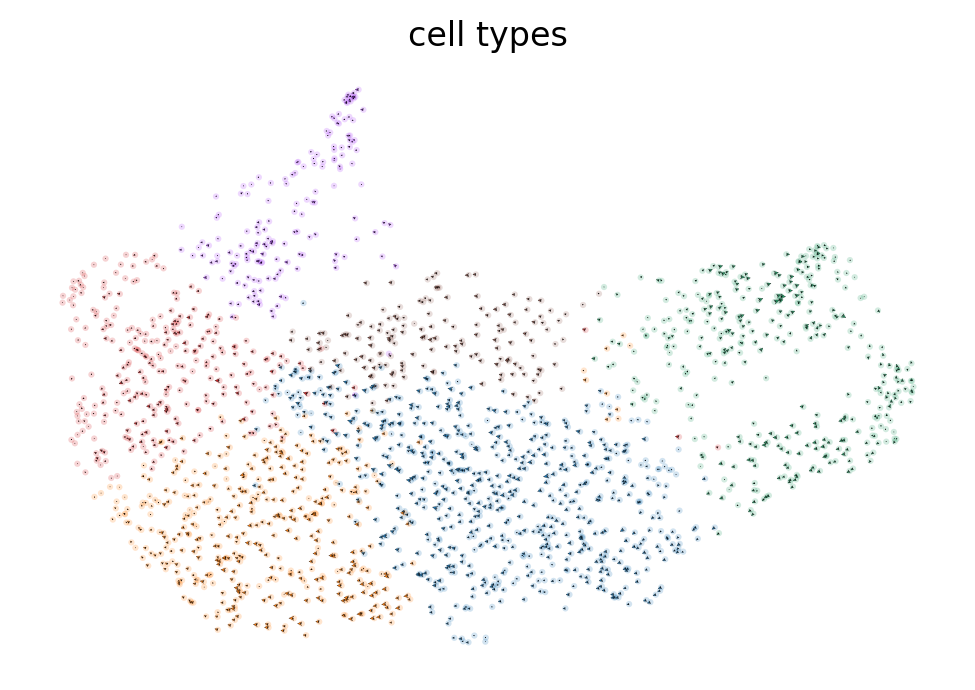

saving figure to file ./out/MSODB_velocity/scvelo_velo_embedding_grid.png


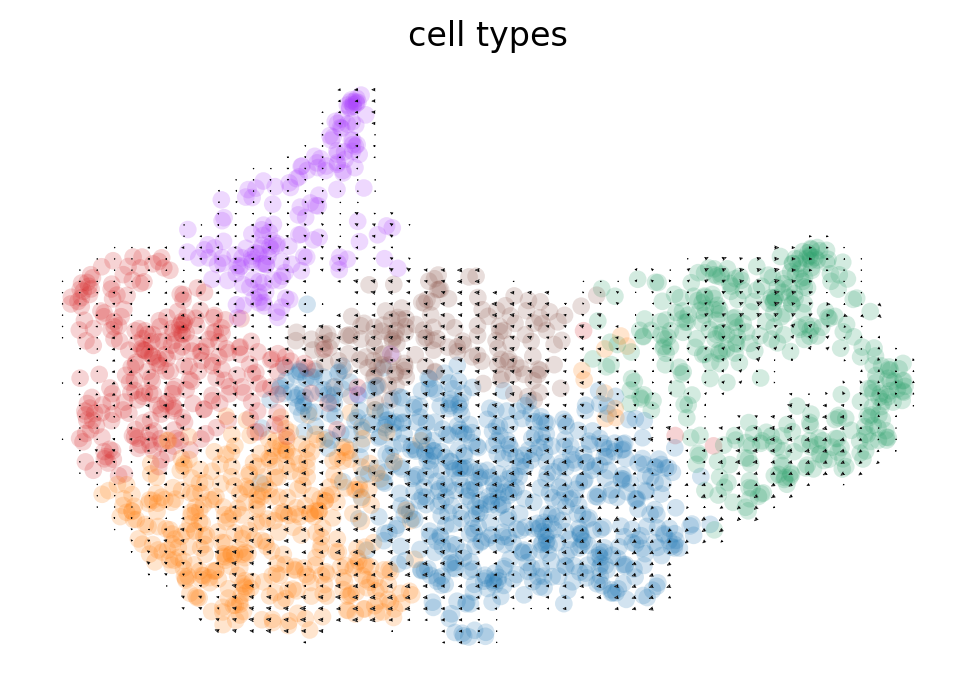

saving figure to file ./out/MSODB_velocity/scvelo_Velo_embedding_flow_.png


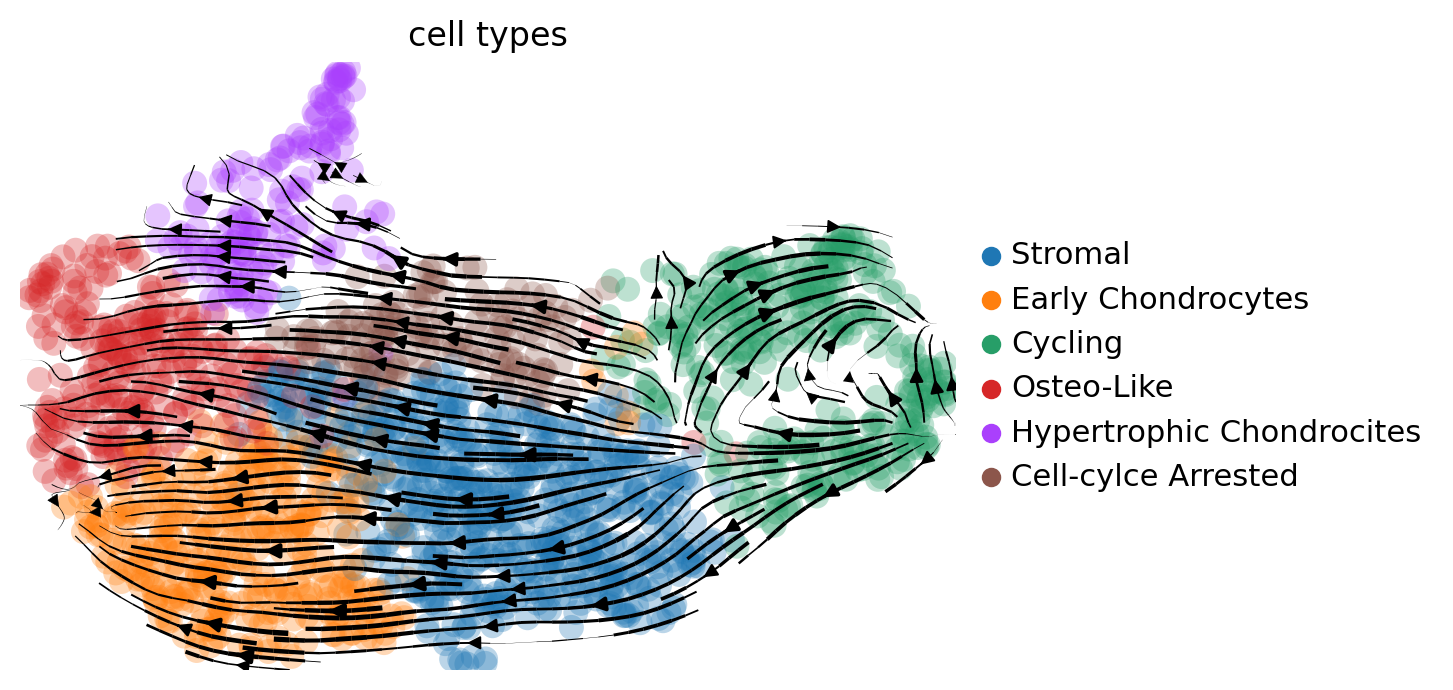

In [13]:
scv.pl.velocity_embedding(adata, basis='umap',arrow_size = 30,color='cell_types', save = 'Velo_embedding')
scv.pl.velocity_embedding_grid(adata, basis='umap', arrow_size = 20,color='cell_types', save = 'velo_embedding_grid')
scv.pl.velocity_embedding_stream(adata, basis='umap',color='cell_types', save= 'Velo_embedding_flow_',legend_loc='right margin')

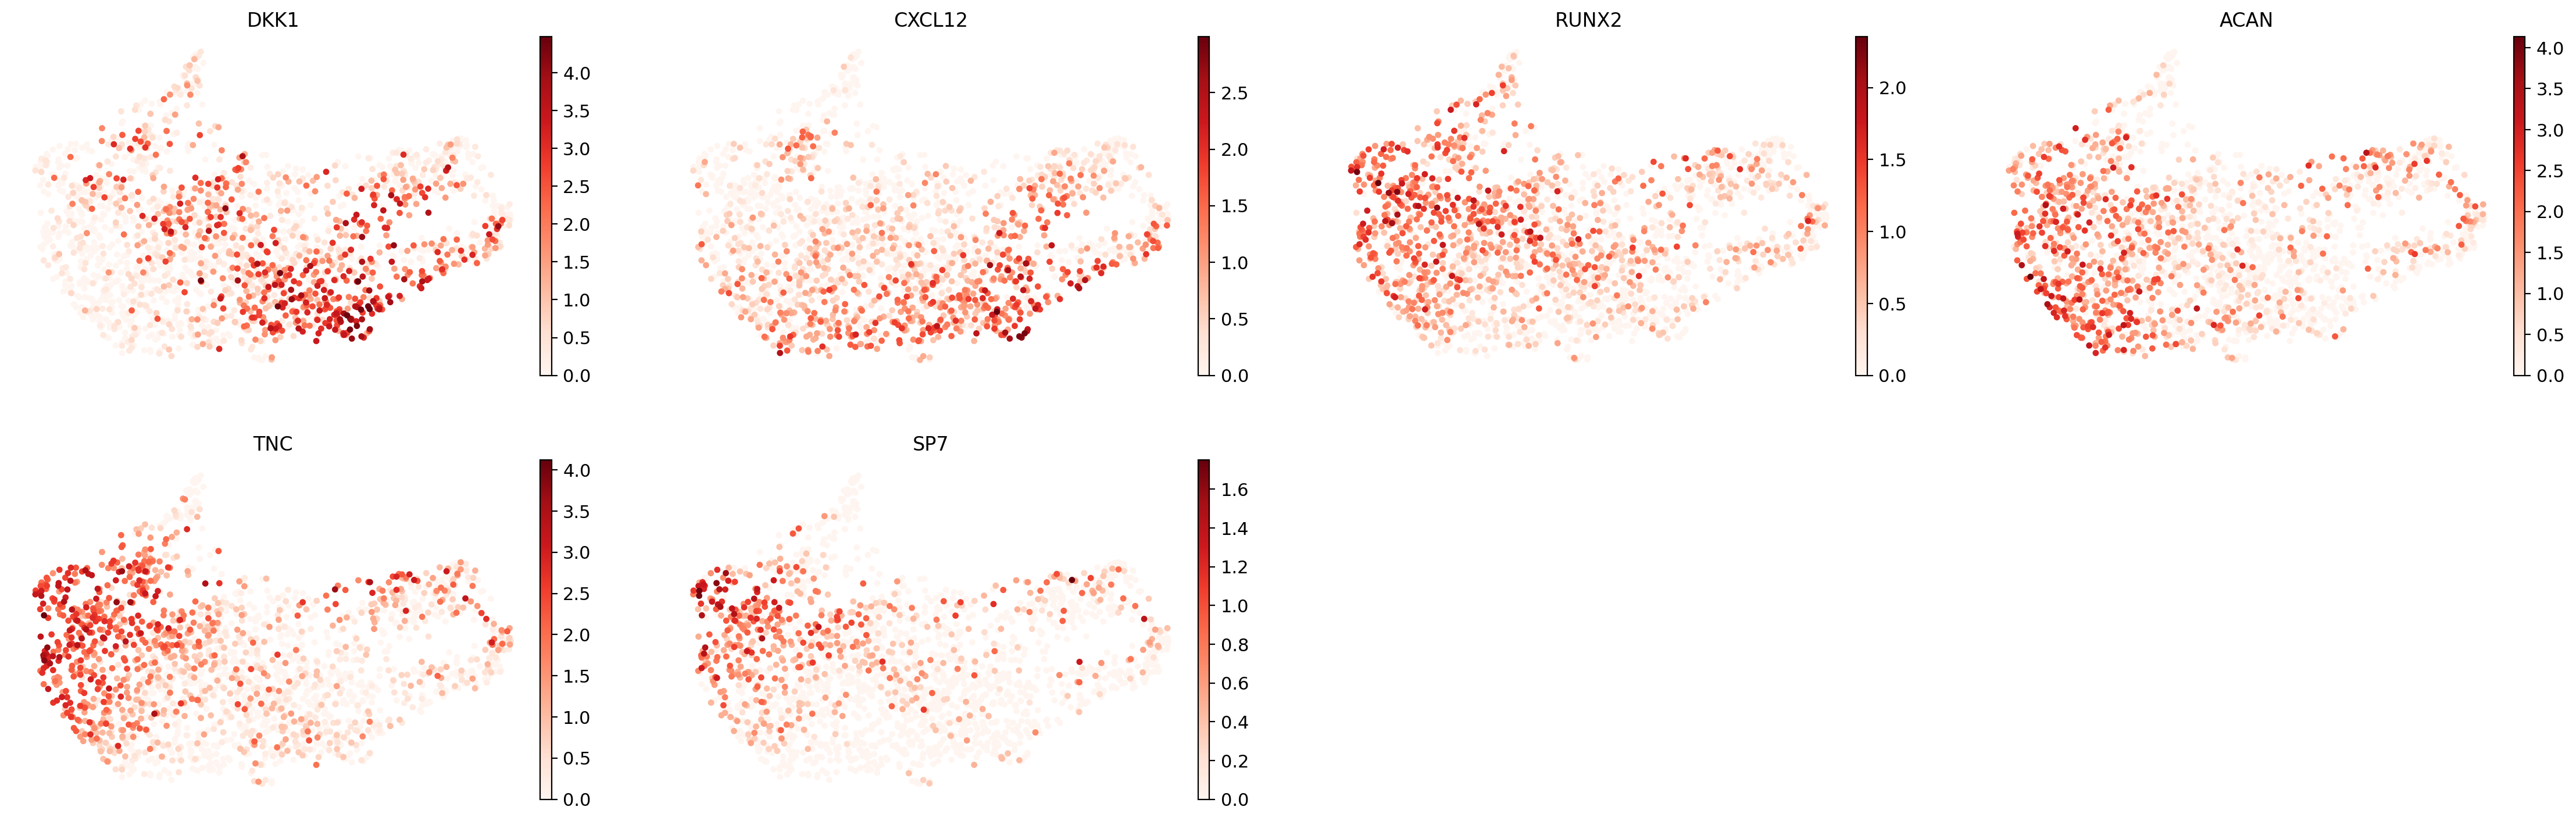

In [14]:
sc.pl.umap(adata, color = ['DKK1', 'CXCL12','RUNX2','ACAN','TNC','SP7'])

In [15]:
adata

AnnData object with n_obs × n_vars = 1979 × 3000
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'leiden_0.4', 'leiden_0.47', 'leiden_0.5', 'leiden_0.6', 'leiden_0.8', 'leiden_1', 'clusters', 'cell_types', 'Clusters', '_X', '_Y', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'velocity_self_transition'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'cell_types_colors', 'clusters_colors', 'hvg', 'leiden', 'leiden_0.47_colors', 'leiden_0.4_colors', 'leiden_0.5_colors', 'leiden_0.6_colors', 'leiden_0.8_colors', 'leiden_1_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes_groups', 'um

saving figure to file ./out/MSODB_velocity/scvelo_GeneVelocity.png


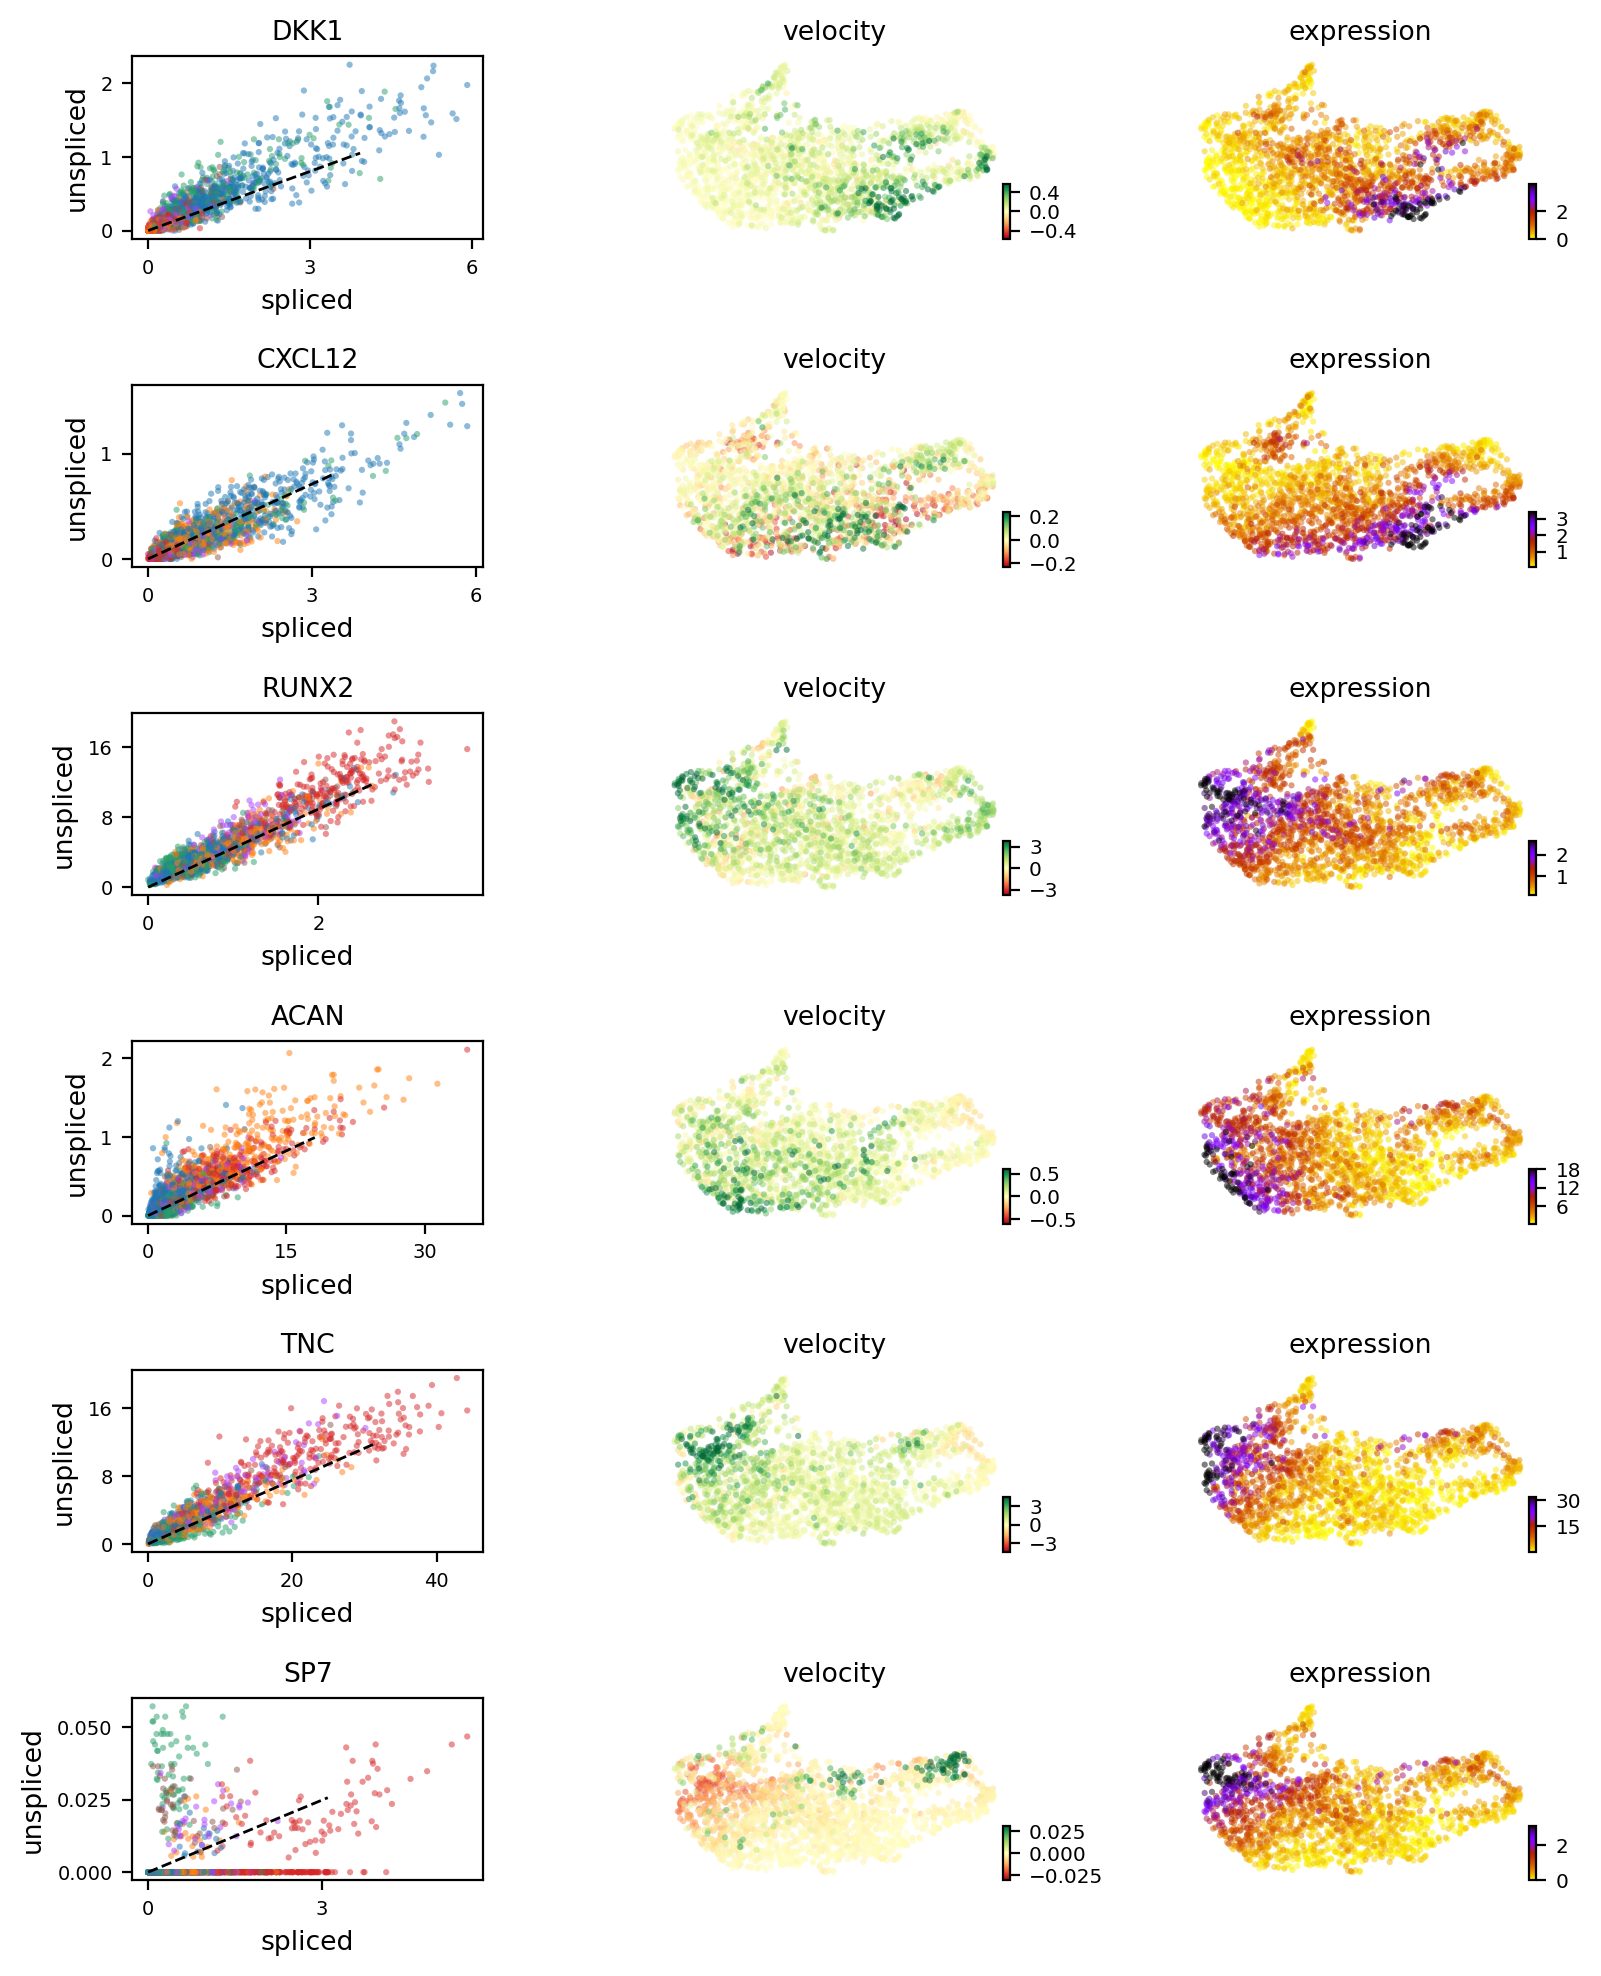

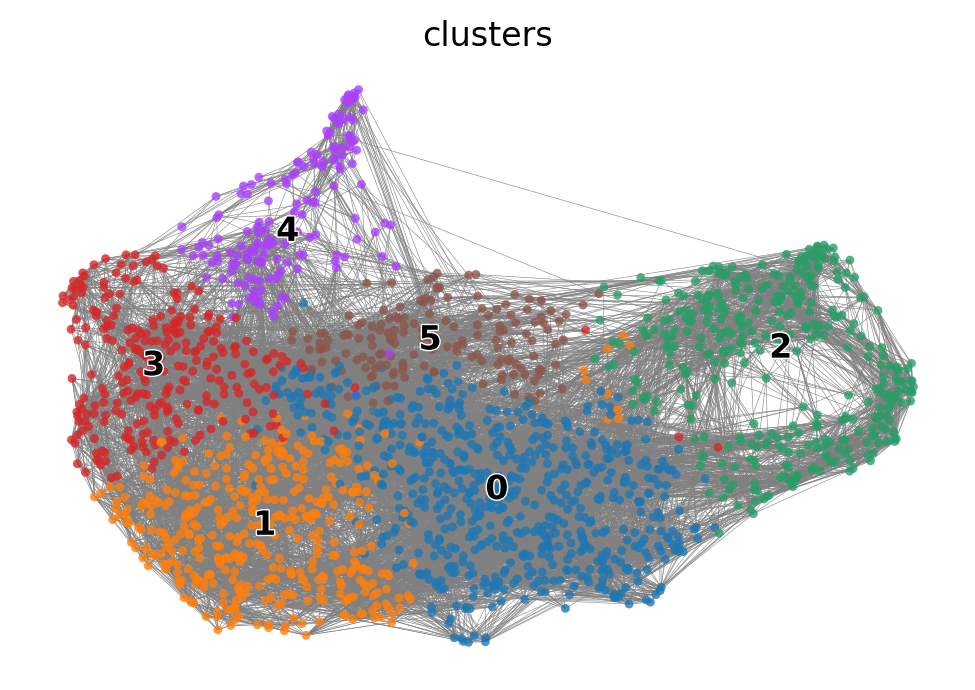

In [16]:
scv.pl.velocity(adata, ['DKK1', 'CXCL12','RUNX2','ACAN','TNC','SP7'], save = 'GeneVelocity')
#scv.pl.scatter(adata, 'SP7', color='leiden_0.7')
scv.pl.velocity_graph(adata)